# Gradient image features: Histogram of Oriented Gradients (HoG) introduction
This exercise is centered around extraction of gradient features from images. It consist of two parts:
1. Construction of sobel (derivative) filters and convolving them with a sample image.
2. Introduction and application of HoG features on a sample image.

The following cell loads a sample image.


(480, 852, 3)


Text(0.5, 1.0, 'Input image')

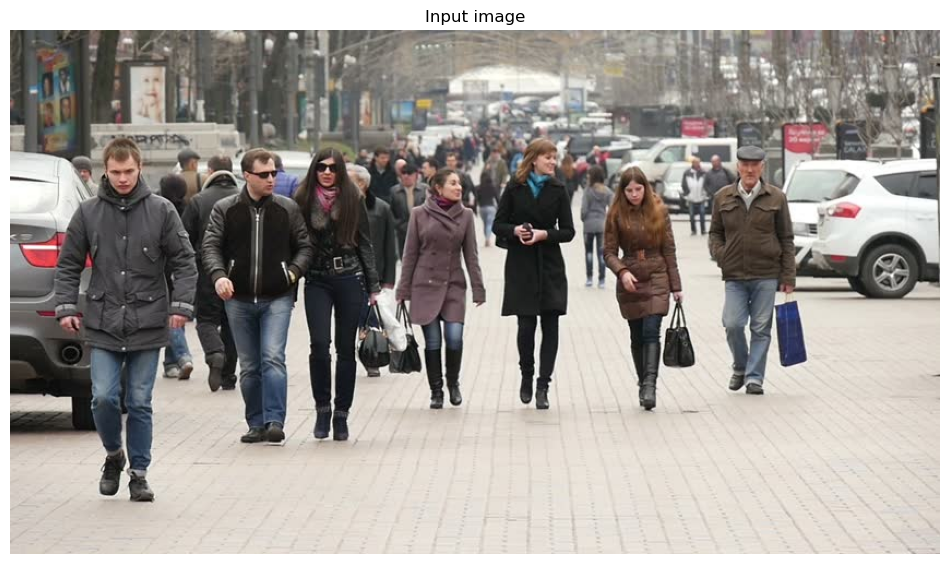

In [2]:
## load input image
import matplotlib.pyplot as plt


fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

fig, ax1 = plt.subplots(figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')


---
**Task 1 (medium): Apply sobel filters👩‍💻**
The goal in this task is to construct derivative (sobel) filters in the x and y direction, and apply them by implementing a convolution algoritm.
The following steps must be completed: 
1. Constuct the two gradient filters defined by the matrices below:


$$
sobel_x=\left[
	\begin{array}{r r r}
		-1 & 0 & 1 \\
		-2 & 0 & 2 \\
		-1 & 0 & 1
	\end{array}
\right],
sobel_y=\left[
	\begin{array}{r r r}
		-1 & -2 & -1 \\
		0 &  0 & 0 \\
		1 & 2 & 1
	\end{array}
\right]
$$
2. (Optional) For the exercises last week, the `convolve`
 method from scipy was used to apply the filters. You are free to reuse the same method for this exercise. Optionally, this week we implement the method `convolve2d`
 from scratch. Below is a breakdown of the `convolve2d`
 function used for performing a 2D convolution operation on an image:
    - Reverse the filter, flipping it both vertically and horizontally, to adhere to the convolution's mathematical definition.

    - Output preparation, create an empty array, the same size as the image, to capture the convolution results.

    - Add zero-padding around the image borders to ensure that the kernel properly processes the edges.

    - Convolution process, iterate over each pixel. For each, apply the kernel, multiply its values with the image segment, and sum the results to assign a new value to the pixel.



3. Apply the sobel filters using `convolve2d`
 (or `convolve`
 from scipy) on the sample image. Plot the results using the provided subplot template.



---

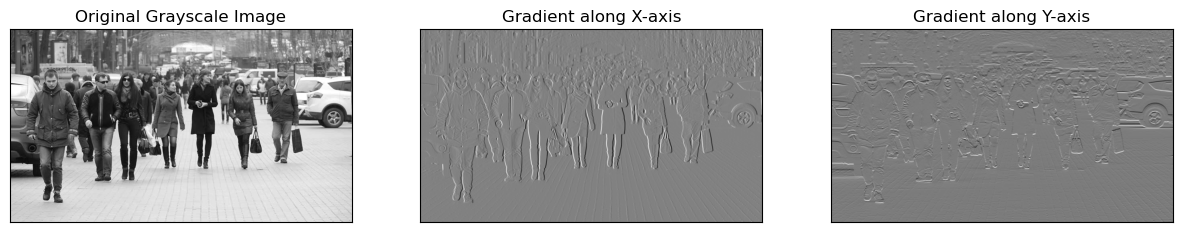

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def rgb2gray(rgb):
    """Convert RGB image to grayscale
       Parameters:
        rgb : RGB image
       Returns:
        Grayscale image
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def convolve2d(image, kernel):
    """Perform 2D convolution on an image using a given kernel
       Parameters:
        image : 2D array
        kernel : 2D kernel array
       Returns:
        Convolved 2D array
    """
    # write implementation here...


# Convert the image to grayscale
gray_image = rgb2gray(image)

# Compute the gradients using the Sobel operator
# Define the Sobel operator kernels.

# Step 1: construct sobel filters 
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
# Step 2: implement / finish
...
# Step 3: convolve the image with the filters
convolve_x = convolve(gray_image, sobel_x)
convolve_y = convolve(gray_image, sobel_y)
# Step 4:  Visualize the original image and gradients with the following subplot template

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray'),
plt.title('Original Grayscale Image')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis

plt.subplot(1, 3, 2)
plt.imshow(convolve_x, cmap='gray')
plt.title('Gradient along X-axis')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis

plt.subplot(1, 3, 3)
plt.imshow(convolve_y, cmap='gray')
plt.title('Gradient along Y-axis')
plt.xticks([]), plt.yticks([])  # Hides the tick values on X and Y axis
plt.show()

In the following section, you are reintroduced (see the classification lecture slides) to the [HOG descriptor](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)
, shown how to calculate a HoG featues for an image, which includes a visualization of the HoG descriptor.
## Overview of Histogram of Oriented Gradients (HOG) Algorithm
The Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision and image processing to detect objects. The process involves the following stages:

**1. Preprocessing / Smoothing:**

Initially, the image undergoes a global normalization application — a procedure that diminishes the effects of lighting discrepancies. A common technique involves gamma (power-law) compression, which can be achieved by calculating the square root or logarithm of each color channel. This stage helps in lessening the impact of local shadowing and highlights variations since the image texture strength is generally related to the local surface illumination.

**2. Calculation of Image Gradients:**

This stage focuses on computing the first-order image gradients. These gradients are crucial as they encapsulate information regarding contours, silhouettes, and textures. This process helps in maintaining resistance to different lighting conditions. The standard procedure is to either convert the image to grayscale or use the most prominent color channel. 

**Info**

This step was implemented by us in the first part of the exercise.
 
**3. Creation of Cells and Calculation of Histograms:**

The objective here is to create an encoding that is attuned to local image content, yet stable against minor alterations in posture or appearance. This method involves partitioning the image window into smaller spatial segments known as "cells." Each cell undergoes a process to accumulate a local 1-D histogram that calculates gradient or edge orientations across all pixels within the cell. This histogram, known as the "orientation histogram," categorizes the gradient angle range into several predetermined bins, with the gradient magnitudes of the cell's pixels contributing to the histogram's data.

**4. Normalization Across Blocks:**

The subsequent stage involves normalizing, which takes into account local arrays of cells, and performs contrast adjustments on their collective responses before the next phase. This step is pivotal for achieving invariance to lighting, shadowing, and edge contrast. It operates by gathering a metric of local histogram "energy" over localized cell groups termed "blocks." This metric is then employed to normalize each cell within the block. Notably, while each cell might be common to multiple blocks, the normalizations are unique to each block, resulting in the cell's repeated appearance with distinct normalizations in the final output vector. Despite seeming redundant, this technique enhances performance. The descriptors obtained from these normalised blocks are what constitute the Histogram of Oriented Gradient (HOG) descriptors.
**5. Compilation of Feature Vector:**


The concluding step amalgamates the HOG descriptors from all block groupings, derived from a dense, overlapping grid spanning the detection window, into a unified feature vector. This vector is integral for the functionality of the window classifier.
In essence, the HOG algorithm is a sophisticated method that converts image data into a format conducive to object detection, with considerable resistance to variations in lighting and posture.

---
**Task 2 (easy): Calculate the HOG descriptor👩‍💻**
After block normalization, concatenate the resulting histograms into the final HOG feature descriptor (vector). 
Use the function [skimage.feature.hog](https://scikit-image.org/docs/stable/api/skimage.feature.html<elem-0>.feature.hog)
 to compute 
the feature descriptor vector from the resized image. Use the command:
```python
(fd, hog) = hog(
image,
orientations=bins,
pixels_per_cell=(pixels_per_cell, pixels_per_cell),
cells_per_block=(cells_per_block, cells_per_block),
block_norm="L2",
visualize=True,
feature_vector=False,
channel_axis=-1)


```
The function `skimage.features.hog`
 also returns the feature descriptor vector (`fd`
), in which its
size is equal to the number of: Bins $\times$ Block Columns
$\times$ Block Rows $\times$ Cells in the Block.

---

(270, 220, 3)


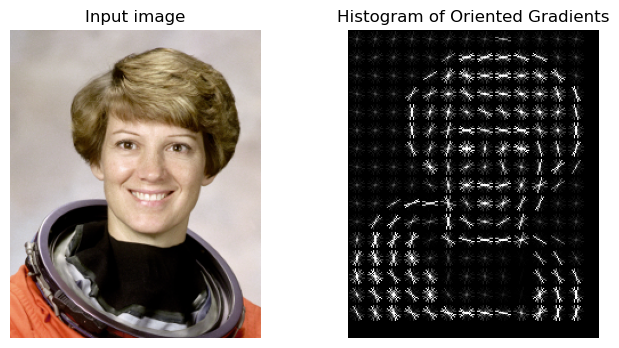

In [4]:
from skimage.feature import hog
from skimage import data, exposure

# load new image
image1 = data.astronaut()[:270,100:320]
print(image1.shape)

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4

# replace this with hog feature results. fd is the feature vector and hog_image is the visualization of the calculated gradients.
fd1, hog_feat1 = hog(
    image1, 
    orientations=bins, 
    pixels_per_cell=(pixels_per_cell, pixels_per_cell), 
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm='L2',
    visualize=True,
    feature_vector=feature_vector,
    channel_axis=-1
)

# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_feat1, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


---
**Task 3 (easy): Test the HOG descriptor👩‍💻**
Test the HOG descriptor and function settings: 
Try changing:
- The number of bins
- The number of pixels per cell
- The number of cells per block

1. The number of cells per block does not change the visulization, why is that? what does it actually affect?
2. How much does the features space reduce by doing HoG (compare to the default setting)?    - Follow-up (optional), how is the number of output features (i.e. shape of HoG feature vector) defined by the settings (number of bins, number of pixels per cell, and number of cells per block) 
**Tip**
Use the output shape of the feature vector to infer the relationship.






---
In the next cell we load another image (of a cat) and run the same code as above


1. Changing the `cells_per_block` parameters changes the size of the block moving over the image, and thereby how many blocks each cell is a part of. E.g. if we have 16 pixels per cell and a 64x64 image, then there are 4x4 cells ($16 \cdot 4 = 64$) no matter what, then `cells_per_block` simply says whether $1, 2, \cdots, \ or \ 4$ cells overlap when moving the block over the image. This affects the normalization and the final feature vector but will not be shown in the visualization of each cell.
2. Say each pixel in an image is a feature, and we have $64 \times 64$ image, 8 bins (orientations), (16, 16) pixels cells, and (2, 2) cell blocks. Then we have $4 \times 4$ cells and a stride of 1 cell, which results in a histogram with $3 \cdot 3 \cdot 4 \cdot 8 = 288 \ entries$ --> 288 features from a total of $64 \cdot 64 = 4096$

(270, 220, 3)


Text(0.5, 1.0, 'Histogram of Oriented Gradients')

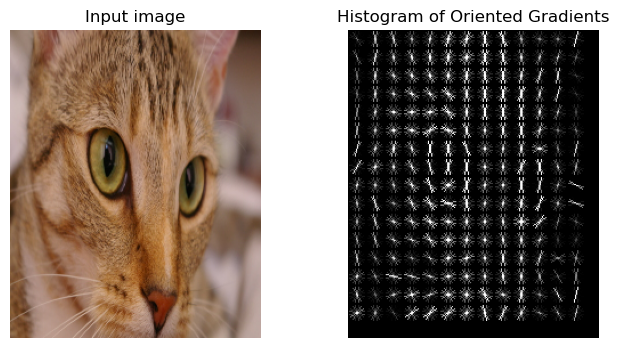

In [21]:
image2 = data.cat()[:270,:440:2]
print(image2.shape)

bins = 8
pixels_per_cell = 16
cells_per_block = 4

# replace this with hog feature results. fd is the feature vector and hog_image is the visualization of the calculated gradients.
fd2,hog_feat2 = hog(
    image2,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    visualize=True,
    feature_vector=feature_vector,
    channel_axis=-1,
)

# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled2 = exposure.rescale_intensity(hog_feat2, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled2, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')


---
**Task 4 (easy): Use Hog Features👩‍💻**
In this task compare the HoG features extracted from the two images. Specifically do the following:
1. For different setting visually compare the hog features
2. Calculate the normalized (use `np.linalg.norm`
 to normalize vectors) scalar product between the two feature vectors `fd1`
 and `fd2`.     
    - Was is the scalar product between two feacture vectors? (compare it to the value of 1 )
    - Repeat the calculation for multiple HoG filter settings, notice a difference? 



#tip(Set `feature_vector`
=True in `hog`
)

3. Based on the similarity, explain how HoG features can be used to classify different images of cat/humans.


---

2. We're measuring the cosine similarity of the two vectors
    - We see that the result is $0.45$ and a value of $1.0$ would indicate they were completely similar and vice versa for $0.0$. So summarized they do share some similarities but not enough to say they're the same
    - Increasing bins and cells per block decreases the similarity of the image while increasing the pixel per cell increases the similarity between the two images. This shows how increasing the amount of pixels per cell, makes it harder to make out the objects in the image (to a certain degree), while increasing the bins allows for more features of the image to be included, and increasing the cells allows differences in other cells to show up more in a given cell
3. A threshold could be identified where past a certain similarity an image could be said to contain said object. Say we have an image of a human and an image of a cat, we then compare a third image to each of our two known images, in order to identify if a cat or human is contained in the image

Question 2 part 1: 0.5085840825482062


/tmp/ipykernel_515/4277818693.py:26: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(fd1, fd2) / (np.linalg.norm(fd1) * np.linalg.norm(fd2))


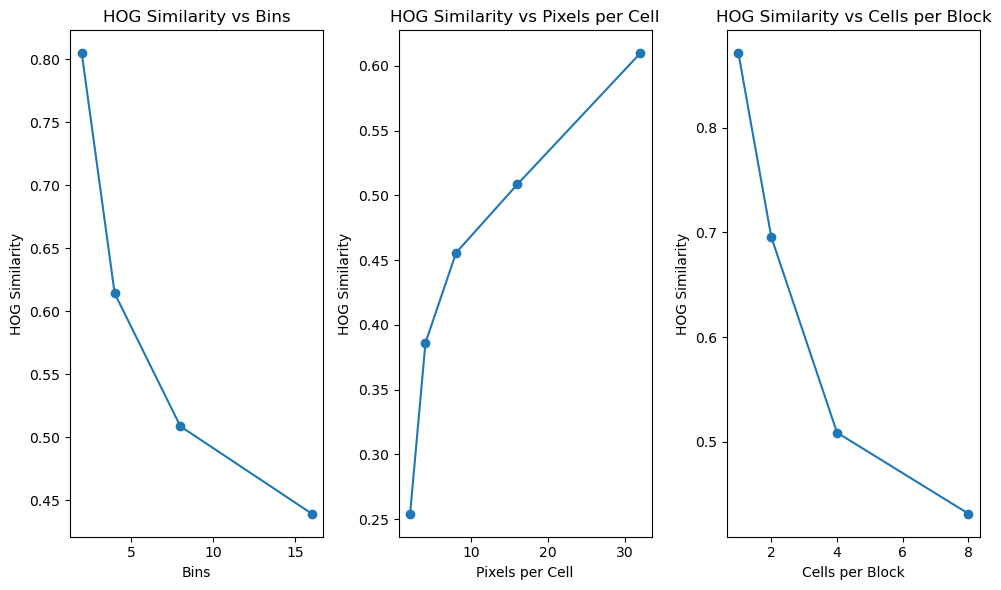

In [19]:
# 2
def calc_hog_norm(image1, image2, orientations, pixels_per_cell, cells_per_block):
    fd1, _ = hog(
        image1,
        orientations=orientations,
        pixels_per_cell=(pixels_per_cell, pixels_per_cell),
        cells_per_block=(cells_per_block, cells_per_block),
        feature_vector=True,
        visualize=True,
        channel_axis=-1,
    )

    fd2, _ = hog(
        image2,
        orientations=orientations,
        pixels_per_cell=(pixels_per_cell, pixels_per_cell),
        cells_per_block=(cells_per_block, cells_per_block),
        feature_vector=True,
        visualize=True,
        channel_axis=-1,
    )

    fd1_norm = fd1 / np.linalg.norm(fd1)
    fd2_norm = fd2 / np.linalg.norm(fd2)

    return np.dot(fd1, fd2) / (np.linalg.norm(fd1) * np.linalg.norm(fd2))
    # return np.dot(fd1_norm, fd2_norm)

bins = 8
pixels_per_cell = 16
cells_per_block = 4
print(f'Question 2 part 1: {calc_hog_norm(image1, image2, bins, pixels_per_cell, cells_per_block)}')



orientations = [2, 4, 8, 16]
bin_change = []
for bin in orientations:
    bin_change.append(calc_hog_norm(image1, image2, bin, pixels_per_cell, cells_per_block))

pixels = [2, 4, 8, 16, 32, 64]
pixel_change = []
for pixel in pixels:
    pixel_change.append(calc_hog_norm(image1, image2, bins, pixel, cells_per_block))

cells = [1, 2, 4, 8]
cell_change = []
for cell in cells:
    cell_change.append(calc_hog_norm(image1, image2, bins, pixels_per_cell, cell))


plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.plot(orientations, bin_change, marker='o')
plt.xlabel('Bins')
plt.ylabel('HOG Similarity')
plt.title('HOG Similarity vs Bins')

plt.subplot(1, 3, 2)
plt.plot(pixels, pixel_change, marker='o')
plt.xlabel('Pixels per Cell')
plt.ylabel('HOG Similarity')
plt.title('HOG Similarity vs Pixels per Cell')

plt.subplot(1, 3, 3)
plt.plot(cells, cell_change, marker='o')
plt.xlabel('Cells per Block')
plt.ylabel('HOG Similarity')
plt.title('HOG Similarity vs Cells per Block')

plt.tight_layout()
plt.show()



---
**Task 5 (medium): Interpretation/ Understanding questions💡**
Test your implementation by selecting
multiple images available in our dataset (`peopleXY.jpg`
). You
have to compare (visually) the HOG features of people and non-people
images. 
- What is visually needed for humans to identify objects visually, compared to hog features?
- How would you apply HoG features in practice to classify different objects in a larger image with multiple people? 


---We will get back to that next week!
The code in the cell below visualizes the HoG features:


- Humans would use a unique shape and/or combination of colors. Consider an image of an eye from a random animal, while some eyes are unique many aren't which makes it difficult to guess which animal the eye is from. But given a larger part of the animal, say the head, now we have a more unique shape and more colors, or lack thereof, which makes it easier to make out which animal is in the picture. Hog features do something similar to using the shape of objects to identify them, as it uses the edges of objects in images to get their rough shape
- Detecting multiple objects in an image becomes quite a combinatorial challenge, I would either:
    - Compare individual blocks to references, and try multiple block sizes to cover variations in the image
    - Identify unique shapes of objects, e.g. looking for a human I would look for heads, arms, legs, torsos, etc. Again, with varying block sizes

(480, 852, 3)
 HoG feature vector shape: (172800,)
 HoG feature vector shape after vectorization: (172800,)


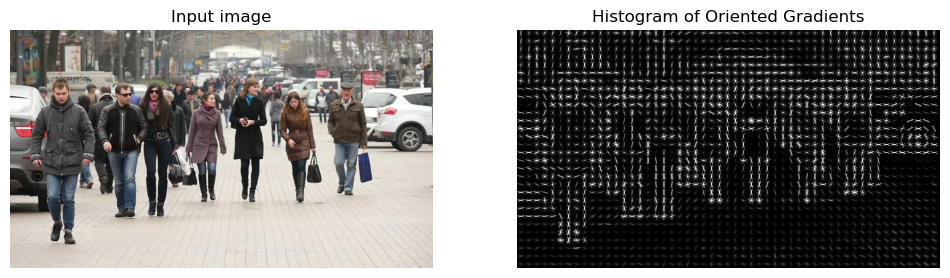

In [24]:
# load new image
fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4 

fd,hog_image = hog(
    image,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    feature_vector=True,
    visualize=True,
    channel_axis=-1,
)

print(f' HoG feature vector shape: {fd.shape}')
print(f' HoG feature vector shape after vectorization: {fd.reshape(-1).shape}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()